<a href="https://colab.research.google.com/github/acedesci/scanalytics/blob/master/S04_Data_Structures_2/S4_LectureEx_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# S4 - Python Data Structures II and SCM examples
Programming topics covered in this section:
* Creating `DataFrame` and `Series` objects
* Reading and writing data using pandas
* Indexing, selecting and assigning
* Summary functions and maps
* Grouping and sorting
* Data types and missing values
* Renaming and combining

Examples include:
* Importing and analyzing data of cereal sales

----
## Preliminaries

pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. This notebook provides a summary of the different components you have seen during the [Kaggle Pandas course](https://www.kaggle.com/learn/pandas). 

There are two core objects in pandas: 
* `DataFrame`: A DataFrame is a table. It contains an array of individual entries, each of which has a certain value. Each entry corresponds to a row (or record) and a column.
* `Series`: A Series is a sequence of data values. If a DataFrame is a table, a Series is a list. A Series is, in essence, a single column of a DataFrame. 

**Note that most operations in pandas are returning you a new object. These operations are not generally done in-place. Thus, if you want to keep your results, you need to assign them to a variable.**

---
## 1. Creating `DataFrame` and `Series` objects

To use the pandas library, you first need to import it; you can and should import it only one time per Jupyter Notebook. You can do this using different ways (as also for other libraries). The first approach consists of the following:
``` python
import pandas
```
By doing so, you then need to use `pandas` in front of all the pandas elements you want to access. For example, to create a `DataFrame`, you would need to do the following:
``` python
pandas.DataFrame({'Yes':[50, 21], 'No':[131, 2]})
```
---
The second approach consists of importing the library under an alias (i.e., a different name). A convention when importing pandas is to import it under the name `pd`. This allows to reduce the number of letters to type afterwards. For example, the previous code would reduce to:
``` python
import pandas as pd
pd.DataFrame({'Yes':[50, 21], 'No':[131, 2]})
```
---
The third approach consists of importing only the elements you need from the library. For example, if we just need the `DataFrame` object, we could do the following:
``` python
from pandas import DataFrame
DataFrame({'Yes':[50, 21], 'No':[131, 2]})
```
---
Ok, let's stick with the convention and import `pandas` with the following:

In [ ]:
import pandas as pd

### `DataFrame`
The two main objects of interest in the `pandas` library are the `DataFrame` and `Series` objects. It is possible to create a `DataFrame` by passing a dictionnary where the keys are the column labels and the values are lists containing the different elements of the corresponding column. Note that all lists should be of the same length.

In [ ]:
pd.DataFrame({'Yes':[50, 21], 'No':[131, 2]})

,Yes,No
0,50,131
1,21,2


### `Series`
It is possible to create a `Series` by providing a list. A `Series` can be considered as one column of a `DataFrame`.

In [ ]:
pd.Series([4, 5, 2, 9])

0    4
1    5
2    2
3    9
dtype: int64

---
## 2. Reading and writing data using pandas

### Importing Data
Most of the time, we won't necessarily enter the data by ourself in the constructor, but rather import it from an external file. This can be done using the commands `read_csv()` for CSV (Comma-Separated Values) files or `read_excel()` for Excel files. Other options are also available in the pandas documentation.

Let's now import a CSV file:

In [ ]:
# Import the column WEEK_END_DATE as dates
df = pd.read_csv('salesCerealsOriginal.csv', parse_dates=['WEEK_END_DATE']) 
df.shape

(1067, 15)

In [ ]:
df.head()

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,DESCRIPTION,CATEGORY,SUB_CATEGORY
0,2009-01-14,367,1111085319,14,13,13,26.32,1.88,1.88,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL
1,2009-01-14,367,1111085350,35,27,25,69.30,1.98,1.98,0,0,0,PL BT SZ FRSTD SHRD WHT,COLD CEREAL,ALL FAMILY CEREAL
2,2009-01-14,367,1600027527,12,10,10,38.28,3.19,3.19,0,0,0,GM HONEY NUT CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL
3,2009-01-14,367,1600027528,31,26,19,142.29,4.59,4.59,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL
4,2009-01-14,367,1600027564,56,48,42,152.32,2.72,3.07,1,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL



**Note:**
* `.read_csv()`: is an important pandas function to read csv files and do operations on it
* `parse_dates`: is a parameter of the `.read_csv()` function. It converts the specified data in datetime datatype. Check [this page](https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.read_csv.html) for more information about the parameters of the `.read_csv()` function
* `df.shape`: Return a tuple representing the dimensionality of the DataFrame `df`
* `.head()`: This function returns the first `n` rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it. By default, `n=5`, so that `df.head()` returns only the first 5 rows of the CSV file read and assigned to `df` 

Here is a description of the variables in the previous `DataFrame`. This file will also be reused in class 8 and 9.

| VARIABLE NAME | DESCRIPTION | 
|:----|:----|
|WEEK_END_DATE|week ending date|
|STORE_NUM|store number|
|UPC|(Universal Product Code) product specific identifier|
|UNITS|units sold|
|VISITS|number of unique purchases (baskets) that included the product|
|HHS|# of purchasing households|
|SPEND|total spend (i.e., $ sales)|
|PRICE|actual amount charged for the product at shelf|
|BASE_PRICE|base price of item|
|FEATURE|product was in in-store circular|
|DISPLAY|product was a part of in-store promotional display|
|TPR_ONLY|temporary price reduction only (i.e., shelf tag only, product was reduced in price but not on display or in an advertisement)|
|DESCRIPTION|product description|
|CATEGORY|category of product|
|SUB_CATEGORY|sub-category of product|



### Exporting Data
Exporting data can be done with analoguous methods such as `to_csv()` and `to_excel()`.

## 3. Indexing, Selecting and Assigning

You can access any columns of a `DataFrame` by either using the dot-notation or by using square brackets `[]`. Then, you can access a specific row within this column by using the brackets `[]` again with the row number. Note that this second indexing can sometime lead to strange results depending on how the indexes are set.

Let's take a look to the UPC column:

In [ ]:
df.UPC

0       1111085319
1       1111085350
2       1600027527
3       1600027528
4       1600027564
           ...    
1062    1111085350
1063    1600027527
1064    1600027528
1065    1600027564
1066    3800031829
Name: UPC, Length: 1067, dtype: int64

In [ ]:
df.UPC[0]

1111085319

In [ ]:
df['UPC'][0]

1111085319

Note that we can use either `df.UPC[0]` or `df['UPC'][0]` to access the  Universal Product Code of the first item in the list.

### Index-based selection
Another way to access elements of a `DataFrame` is by using **index-based selection**, i.e., the `iloc[]` method. For example, to access the first row of the column number 3 (i.e., the column 'UPC'), we do

In [ ]:
df.iloc[0,2]

1111085319

### Label-based selection
A third option consists of **label-based selection** where we selects by the row and column labels, i.e., the `loc[]` method. Continuing on our last example, we do

In [ ]:
df.loc[0,'UPC']

1111085319

It is also possible to use the `loc[]` method with boolean masks. For example, to show all the rows related to the UPC 1111085319, we can do the following. 

In [ ]:
df.loc[df.UPC == 1111085319]

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,DESCRIPTION,CATEGORY,SUB_CATEGORY
0,2009-01-14,367,1111085319,14,13,13,26.32,1.88,1.88,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL
7,2009-01-21,367,1111085319,12,12,12,22.68,1.89,1.89,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL
14,2009-01-28,367,1111085319,18,17,16,33.66,1.87,1.87,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL
21,2009-02-04,367,1111085319,13,13,13,24.44,1.88,1.88,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL
28,2009-02-11,367,1111085319,16,16,16,29.92,1.87,1.87,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,2011-12-07,367,1111085319,12,12,12,21.84,1.82,1.82,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL
1043,2011-12-14,367,1111085319,14,14,14,22.82,1.63,1.82,0,0,1,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL
1049,2011-12-21,367,1111085319,8,8,8,13.36,1.67,1.67,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL
1055,2011-12-28,367,1111085319,3,2,2,4.95,1.65,1.65,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL


These boolean expressions can be mixed with the ampersand (`&`) to denote an element-wise 'and', and the pipe (`|`) to denote an element-wise 'or'. The `isin()` method can also be useful.

In [ ]:
df.loc[(df.UPC == 1111085319) & (df.FEATURE == True)]

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,DESCRIPTION,CATEGORY,SUB_CATEGORY
112,2009-05-06,367,1111085319,31,28,27,51.46,1.66,1.89,1,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL
217,2009-08-19,367,1111085319,22,22,21,36.08,1.64,1.89,1,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL
788,2011-03-16,367,1111085319,15,13,13,25.05,1.67,1.89,1,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL
802,2011-03-30,367,1111085319,14,12,12,23.38,1.67,1.89,1,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL


Finally, to find null and non-null values, you can use the `isnull()` and `notnull()` methods. For example, using `isnull()` to `df` shows us a `boolean` indicating whether each corresponding element is missing.

In [ ]:
df.isnull()

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,DESCRIPTION,CATEGORY,SUB_CATEGORY
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1063,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1064,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1065,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


We can do the same for one or more columns of the `DataFrame`.  For this, we make sure we use double brackets `[[]]` to indicate the columns we want to select, as the `.isnull()` and `.notnull()` are methods for `DataFrame`. The single bracket with output a `pandas Series`, while a double bracket will output a `pandas DataFrame`.

In [ ]:
df[['UPC', 'UNITS']].isnull()

,UPC,UNITS
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1062,False,False
1063,False,False
1064,False,False
1065,False,False


## 4. Summary Functions and Maps

Some interesting summary functions are the `describe()`, `unique()` and `value_counts()` methods. By running these methods below, we are able to find that there is only one store in this dataset and that only 7 different UPCs are in the dataset. We also find that there is data for 156 weeks.
These functions are very useful to do a preliminary analysis of our data.

* `describe()`: This method generates a high-level summary of the attributes of the given column. It is type-aware, meaning that its output changes based on the data type of the input (string or numerical).

In [ ]:
df.describe()

,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY
count,1067.0,1.067000e+03,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,367.0,1.951150e+09,21.254920,18.419869,14.753515,62.282971,2.913627,3.074808,0.085286,0.059044,0.156514
std,0.0,9.459679e+08,16.805829,13.416754,12.507940,47.895126,0.894750,0.863631,0.279438,0.235818,0.363512
min,367.0,1.111085e+09,1.000000,1.000000,1.000000,1.870000,1.510000,1.600000,0.000000,0.000000,0.000000
25%,367.0,1.111085e+09,12.000000,12.000000,8.000000,28.715000,2.060000,2.430000,0.000000,0.000000,0.000000
50%,367.0,1.600028e+09,19.000000,17.000000,13.000000,50.880000,2.850000,3.050000,0.000000,0.000000,0.000000
75%,367.0,3.000006e+09,27.000000,23.000000,18.000000,81.920000,3.290000,3.290000,0.000000,0.000000,0.000000
max,367.0,3.800032e+09,243.000000,187.000000,179.000000,414.400000,4.790000,4.790000,1.000000,1.000000,1.000000


* `unique()`: shows a list of unique values

In [ ]:
df.STORE_NUM.unique()

array([367], dtype=int64)

* `.value_counts()`: shows a list of unique values and how often they occur in the dataset

In [ ]:
df.UPC.value_counts()

1600027528    156
1600027527    156
1111085350    156
1111085319    156
1600027564    155
3800031829    155
3000006340    133
Name: UPC, dtype: int64

In [ ]:
df.WEEK_END_DATE.value_counts()

2011-04-27    7
2011-07-20    7
2010-03-24    7
2010-10-13    7
2009-07-08    7
             ..
2011-12-28    6
2011-10-05    6
2010-11-17    6
2011-09-28    6
2011-12-14    6
Name: WEEK_END_DATE, Length: 156, dtype: int64

### Map
The `map()` method is useful to apply a function to every element of a subset of a `DataFrame`. It is often used with a `lambda` expression which allows to define a function that won't be reused somewhere else in the code. A `lambda` expression first defines the input(s) on the left-hand side of the column (`:`). Then, on the right-hand side of the column (`:`), it provides what should be returned by this function. *If your function requires several lines of code, it may be better to define a function using a standard `def ...` syntax instead of a `lambda` expression.*

As an example, the following function
``` python
def times_two(x):
    return x * 2
```
is equivalent to the following `lambda` expression
``` python
lambda x: x * 2
```



Let's take a look at the current values in column `PRICE` of our `DataFrame`:

In [ ]:
df.PRICE

0       1.88
1       1.98
2       3.19
3       4.59
4       2.72
        ... 
1062    2.49
1063    1.93
1064    4.79
1065    3.19
1066    3.89
Name: PRICE, Length: 1067, dtype: float64

We can use the `.map()` method to make some operations using the values in the `PRICE` column. For example: 

In [ ]:
def times_two(x):
    return x * 2

df.PRICE.map(times_two)

0       3.76
1       3.96
2       6.38
3       9.18
4       5.44
        ... 
1062    4.98
1063    3.86
1064    9.58
1065    6.38
1066    7.78
Name: PRICE, Length: 1067, dtype: float64

In [ ]:
df.PRICE.map(lambda x: x * 2)

0       3.76
1       3.96
2       6.38
3       9.18
4       5.44
        ... 
1062    4.98
1063    3.86
1064    9.58
1065    6.38
1066    7.78
Name: PRICE, Length: 1067, dtype: float64

**Note:** iwe are not making modifications in the column `PRICE` of our `DataFrame`. We are just using its values to perform some operations. We can check that the values in this column remain the same:


In [ ]:
df.PRICE

0       1.88
1       1.98
2       3.19
3       4.59
4       2.72
        ... 
1062    2.49
1063    1.93
1064    4.79
1065    3.19
1066    3.89
Name: PRICE, Length: 1067, dtype: float64

We can create new columns in our `DataFrame` based on operations made using `.map()`. For instance, we can create a column named `DOUBLEPRICE` to save the results of applying the `.map()` method to the `PRICE` column.

In [ ]:
df['DOUBLEPRICE']=df.PRICE.map(lambda x: x * 2)
df.DOUBLEPRICE

0       3.76
1       3.96
2       6.38
3       9.18
4       5.44
        ... 
1062    4.98
1063    3.86
1064    9.58
1065    6.38
1066    7.78
Name: DOUBLEPRICE, Length: 1067, dtype: float64

Let's normalize the column `SPEND`. Again, note that the result is not saved since it is not assigned to a variable

In [ ]:
df.SPEND.map(
    lambda x: (x - df.SPEND.mean()) / df.SPEND.std())

0      -0.750869
1       0.146508
2      -0.501157
3       1.670463
4       1.879879
          ...   
1062   -1.248415
1063   -0.051215
1064    1.399872
1065    1.030732
1066    0.892513
Name: SPEND, Length: 1067, dtype: float64

In [ ]:
# The previous code is equivalent to the following
# where we don't use the map() method
# This following code is also generally faster
(df.SPEND - df.SPEND.mean()) / df.SPEND.std()

0      -0.750869
1       0.146508
2      -0.501157
3       1.670463
4       1.879879
          ...   
1062   -1.248415
1063   -0.051215
1064    1.399872
1065    1.030732
1066    0.892513
Name: SPEND, Length: 1067, dtype: float64

---
### Apply
The `apply()` method allows to go through each row or each column (instead of each element as for the `map()` method). It can also be used with a `lambda` expression.

As an example, let's compute the price rebate in percentage $\left(\frac{\mathit{BASE\_PRICE} - \mathit{PRICE}}{\mathit{BASE\_PRICE}}\right) $ when the item is in the circular ($\mathit{FEATURE}$ is equal to 1). We then add this computation to the column `REBATE_PERC`.

In [ ]:
def rebate_perc(row):
    if row.FEATURE == 1:
        rebate = (row.BASE_PRICE - row.PRICE) / row.BASE_PRICE
        return rebate
    elif row.FEATURE == 0:
        return 0

# axis='columns' allows to go through each row
# axis='index' allows to go through each column
df['REBATE_PERC'] = df.apply(rebate_perc, axis='columns')
df.head()

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,DESCRIPTION,CATEGORY,SUB_CATEGORY,DOUBLEPRICE,REBATE_PERC
0,2009-01-14,367,1111085319,14,13,13,26.32,1.88,1.88,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL,3.76,0.000000
1,2009-01-14,367,1111085350,35,27,25,69.30,1.98,1.98,0,0,0,PL BT SZ FRSTD SHRD WHT,COLD CEREAL,ALL FAMILY CEREAL,3.96,0.000000
2,2009-01-14,367,1600027527,12,10,10,38.28,3.19,3.19,0,0,0,GM HONEY NUT CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,6.38,0.000000
3,2009-01-14,367,1600027528,31,26,19,142.29,4.59,4.59,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,9.18,0.000000
4,2009-01-14,367,1600027564,56,48,42,152.32,2.72,3.07,1,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,5.44,0.114007


---
## 5. Grouping and Sorting

### Group by
The `groupby()` method is similar to the PivotTables in Excel. It allows the group the items by one or several dimensions (the Rows and Columns area in the PivotTable). After grouping the items, you can then compute some summary functions over these groups (the Values area in the PivotTable). These summary functions can be your own defined by a `lambda` expression or a standard function definition (using `def ...`).

As a first example, let's compute the mean selling price of each `UPC` over the data.

In [ ]:
df.groupby('UPC').PRICE.mean()

UPC
1111085319    1.788910
1111085350    2.183333
1600027527    2.893077
1600027528    4.498590
1600027564    2.893355
3000006340    2.878195
3800031829    3.256774
Name: PRICE, dtype: float64

As a second example, let's compute the number of times that each `UPC` appeared in the circular. Remember that this variable is a binary variable.

In [ ]:
df.groupby('UPC').FEATURE.sum()

UPC
1111085319     4
1111085350     9
1600027527    18
1600027528    12
1600027564    16
3000006340    17
3800031829    15
Name: FEATURE, dtype: int64

As a third and last example, let's identify the minimum and maximum prices for each `UPC` and each possible value the `FEATURE` variable (i.e., whether the item is in the circular (1) or not (0)). Note that our returned index is now a **multi-index**. It is possible to move this multi-index as columns by applying the `reset_index()` method.

Here the `.agg()` method aggregates using one or more operations over the specified axis. You can check [this page](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) for more information.

In [ ]:
df.groupby(['UPC', 'FEATURE']).PRICE.agg([min, max])

min   max
UPC        FEATURE            
1111085319 0        1.60  1.99
           1        1.64  1.67
1111085350 0        1.82  2.49
           1        1.90  2.01
1600027527 0        1.68  3.39
           1        1.66  2.99
1600027528 0        2.67  4.79
           1        2.60  3.88
1600027564 0        1.51  3.29
           1        2.34  3.00
3000006340 0        1.93  4.42
           1        1.88  2.56
3800031829 0        2.62  3.89
           1        2.18  3.24

### Sort
It is also possible to sort `DataFrame` or `Series` by one or multiple variables by using the `sort_values()` method. If you want to instead sort the index, you need to use the `sort_index()` method.

For example, below, we are sorting first by `PRICE` and, if there are any equalities, we then sort by `BASE_PRICE`. This sorting is done in descending order.

In [ ]:
df.sort_values(by=['PRICE', 'BASE_PRICE'], ascending=False)

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,DESCRIPTION,CATEGORY,SUB_CATEGORY,DOUBLEPRICE,REBATE_PERC
784,2011-03-09,367,1600027528,27,20,8,129.33,4.79,4.79,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,9.58,0.0
791,2011-03-16,367,1600027528,14,12,7,67.06,4.79,4.79,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,9.58,0.0
798,2011-03-23,367,1600027528,16,15,4,76.64,4.79,4.79,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,9.58,0.0
805,2011-03-30,367,1600027528,39,31,11,186.81,4.79,4.79,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,9.58,0.0
812,2011-04-06,367,1600027528,29,22,6,138.91,4.79,4.79,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,9.58,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,2009-03-04,367,1111085319,2,2,2,3.22,1.61,1.87,0,0,1,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL,3.22,0.0
308,2009-11-18,367,1111085319,20,20,20,32.00,1.60,1.88,0,0,1,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL,3.20,0.0
621,2010-09-29,367,1111085319,22,20,18,35.20,1.60,1.60,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL,3.20,0.0
635,2010-10-13,367,1111085319,30,24,24,48.00,1.60,1.60,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL,3.20,0.0


## 6.  Data Types and Missing Values

Pandas assigns different types to the different columns. Some common types are:
- `int` denoted by `int64`
- `float` denoted by `float64`
- `str` denoted by `object`
- dates denoted by `datetime64[ns]`

Pandas may denote your dates as `object` if it doesn't understand that these are dates. It doesn't make a big difference unless you want to use some of the nice functions available in pandas to manipulate dates.

It is possible to check the type of a column by using the `dtype` property. It is also possible to check the type of all columns by using the `dtypes` property as below.

In [ ]:
df.dtypes

WEEK_END_DATE    datetime64[ns]
STORE_NUM                 int64
UPC                       int64
UNITS                     int64
VISITS                    int64
HHS                       int64
SPEND                   float64
PRICE                   float64
BASE_PRICE              float64
FEATURE                   int64
DISPLAY                   int64
TPR_ONLY                  int64
DESCRIPTION              object
CATEGORY                 object
SUB_CATEGORY             object
DOUBLEPRICE             float64
REBATE_PERC             float64
dtype: object

If you want to convert the type of a column, you can use the `astype()` method.

For example, if we want to convert the type of `STORE_NUM` from `int64` to `float64`, we do the following:

In [ ]:
df.STORE_NUM.astype('float64')  # or just use float

0       367.0
1       367.0
2       367.0
3       367.0
4       367.0
        ...  
1062    367.0
1063    367.0
1064    367.0
1065    367.0
1066    367.0
Name: STORE_NUM, Length: 1067, dtype: float64

### Missing data
It is possible to check whether there are null values in a column of a `DataFrame` (or a full `DataFrame`) by using the `isnull()` function (or its companion `notnull()`). These returns a binary mask indicating whether any null values (denoted by `NaN`) are present. Note that `NaN` values are always of type `float64`.

Let's check below if we have any missing values in the column `SPEND`.

In [ ]:
pd.isnull(df.SPEND)

0       False
1       False
2       False
3       False
4       False
        ...  
1062    False
1063    False
1064    False
1065    False
1066    False
Name: SPEND, Length: 1067, dtype: bool

In [ ]:
pd.isnull(df.SPEND).sum()

0

Let's now check if there are any missing values in any columns.

In [ ]:
pd.isnull(df).sum()

WEEK_END_DATE    0
STORE_NUM        0
UPC              0
UNITS            0
VISITS           0
HHS              0
SPEND            0
PRICE            0
BASE_PRICE       0
FEATURE          0
DISPLAY          0
TPR_ONLY         0
DESCRIPTION      0
CATEGORY         0
SUB_CATEGORY     0
DOUBLEPRICE      0
REBATE_PERC      0
dtype: int64

If we had found any missing values, we could have replaced them by using the `fillna()` method. It is also possible to replace other values by using the `replace()` method.

For example, let's replace the `STORE_NUM` 367 with some text. Note here that there is only one store number in the data.

In [ ]:
df['STORE_TXT'] = df.STORE_NUM.replace(367, 'Kwik-E-Mart')
df

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,DESCRIPTION,CATEGORY,SUB_CATEGORY,DOUBLEPRICE,REBATE_PERC,STORE_TXT
0,2009-01-14,367,1111085319,14,13,13,26.32,1.88,1.88,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL,3.76,0.000000,Kwik-E-Mart
1,2009-01-14,367,1111085350,35,27,25,69.30,1.98,1.98,0,0,0,PL BT SZ FRSTD SHRD WHT,COLD CEREAL,ALL FAMILY CEREAL,3.96,0.000000,Kwik-E-Mart
2,2009-01-14,367,1600027527,12,10,10,38.28,3.19,3.19,0,0,0,GM HONEY NUT CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,6.38,0.000000,Kwik-E-Mart
3,2009-01-14,367,1600027528,31,26,19,142.29,4.59,4.59,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,9.18,0.000000,Kwik-E-Mart
4,2009-01-14,367,1600027564,56,48,42,152.32,2.72,3.07,1,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,5.44,0.114007,Kwik-E-Mart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2012-01-04,367,1111085350,1,1,1,2.49,2.49,2.49,0,0,0,PL BT SZ FRSTD SHRD WHT,COLD CEREAL,ALL FAMILY CEREAL,4.98,0.000000,Kwik-E-Mart
1063,2012-01-04,367,1600027527,31,29,29,59.83,1.93,3.12,1,0,0,GM HONEY NUT CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,3.86,0.381410,Kwik-E-Mart
1064,2012-01-04,367,1600027528,27,26,21,129.33,4.79,4.79,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,9.58,0.000000,Kwik-E-Mart
1065,2012-01-04,367,1600027564,35,29,25,111.65,3.19,3.19,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,6.38,0.000000,Kwik-E-Mart


---
## 7. Renaming and Combining

It is also possible to rename indexes or columns by using the `rename()` method. An elegant way to use this method is by providing a dictionnary where the keys are the indexes/columns current labels and the values are the indexes/columns new labels.

For example, let's rename the `WEEK_END_DATE` column to `END_DATE`.

In [ ]:
df.rename(columns={'WEEK_END_DATE': 'END_DATE'})

,END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,DESCRIPTION,CATEGORY,SUB_CATEGORY,DOUBLEPRICE,REBATE_PERC,STORE_TXT
0,2009-01-14,367,1111085319,14,13,13,26.32,1.88,1.88,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL,3.76,0.000000,Kwik-E-Mart
1,2009-01-14,367,1111085350,35,27,25,69.30,1.98,1.98,0,0,0,PL BT SZ FRSTD SHRD WHT,COLD CEREAL,ALL FAMILY CEREAL,3.96,0.000000,Kwik-E-Mart
2,2009-01-14,367,1600027527,12,10,10,38.28,3.19,3.19,0,0,0,GM HONEY NUT CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,6.38,0.000000,Kwik-E-Mart
3,2009-01-14,367,1600027528,31,26,19,142.29,4.59,4.59,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,9.18,0.000000,Kwik-E-Mart
4,2009-01-14,367,1600027564,56,48,42,152.32,2.72,3.07,1,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,5.44,0.114007,Kwik-E-Mart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2012-01-04,367,1111085350,1,1,1,2.49,2.49,2.49,0,0,0,PL BT SZ FRSTD SHRD WHT,COLD CEREAL,ALL FAMILY CEREAL,4.98,0.000000,Kwik-E-Mart
1063,2012-01-04,367,1600027527,31,29,29,59.83,1.93,3.12,1,0,0,GM HONEY NUT CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,3.86,0.381410,Kwik-E-Mart
1064,2012-01-04,367,1600027528,27,26,21,129.33,4.79,4.79,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,9.58,0.000000,Kwik-E-Mart
1065,2012-01-04,367,1600027564,35,29,25,111.65,3.19,3.19,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,6.38,0.000000,Kwik-E-Mart


As another example, let's rename the index 0 to 'First row' and then the index 1 to 'Second row'.

In [ ]:
df.rename(index={0:'First row', 1:'Second row'})

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,DESCRIPTION,CATEGORY,SUB_CATEGORY,DOUBLEPRICE,REBATE_PERC,STORE_TXT
First row,2009-01-14,367,1111085319,14,13,13,26.32,1.88,1.88,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL,3.76,0.000000,Kwik-E-Mart
Second row,2009-01-14,367,1111085350,35,27,25,69.30,1.98,1.98,0,0,0,PL BT SZ FRSTD SHRD WHT,COLD CEREAL,ALL FAMILY CEREAL,3.96,0.000000,Kwik-E-Mart
2,2009-01-14,367,1600027527,12,10,10,38.28,3.19,3.19,0,0,0,GM HONEY NUT CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,6.38,0.000000,Kwik-E-Mart
3,2009-01-14,367,1600027528,31,26,19,142.29,4.59,4.59,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,9.18,0.000000,Kwik-E-Mart
4,2009-01-14,367,1600027564,56,48,42,152.32,2.72,3.07,1,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,5.44,0.114007,Kwik-E-Mart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2012-01-04,367,1111085350,1,1,1,2.49,2.49,2.49,0,0,0,PL BT SZ FRSTD SHRD WHT,COLD CEREAL,ALL FAMILY CEREAL,4.98,0.000000,Kwik-E-Mart
1063,2012-01-04,367,1600027527,31,29,29,59.83,1.93,3.12,1,0,0,GM HONEY NUT CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,3.86,0.381410,Kwik-E-Mart
1064,2012-01-04,367,1600027528,27,26,21,129.33,4.79,4.79,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,9.58,0.000000,Kwik-E-Mart
1065,2012-01-04,367,1600027564,35,29,25,111.65,3.19,3.19,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,6.38,0.000000,Kwik-E-Mart


### Combining

There exist several methods to join two `DataFrame` together: `concat()`, `join()` and `merge()`. Yet, with only `concat()` and `join()`, it is possible to do almost anything.

* `concat()` is useful when you have two `DataFrame` that contain the same columns but different rows. By using `concat()`, it is possible to put one `DataFrame` at the end of the other and thus obtaining one final big `DataFrame`.

* `join()` is useful to join two `DataFrame` that have an index in common. This is somewhat similar to the VLOOKUP function in Excel. It is often necessary to use the `join()` method since data is often scattered around in multiple databases.

We now demonstrate how to use the `join()` method. Let's say we have some other data describing our UPCs. For example, let's say we have the `WEIGHT` of each `UPC` in another `DataFrame`.

In [ ]:
df2 = pd.DataFrame({
    'UPC': [1111085319, 1111085350, 1600027527, 1600027528, 1600027564, 3000006340, 3800031829],
    'WEIGHT': [500, 450, 300, 475, 550, 380, 500]})
df2

,UPC,WEIGHT
0,1111085319,500
1,1111085350,450
2,1600027527,300
3,1600027528,475
4,1600027564,550
5,3000006340,380
6,3800031829,500


To be able to bring the WEIGHT variable into the main `DataFrame`, we will first need to set the index of both `DataFrame` with the UPC column.

In [ ]:
right = df2.set_index('UPC')
right

,WEIGHT
UPC,
1111085319,500
1111085350,450
1600027527,300
1600027528,475
1600027564,550
3000006340,380
3800031829,500


In [ ]:
left = df.set_index('UPC')
left

,WEEK_END_DATE,STORE_NUM,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,DESCRIPTION,CATEGORY,SUB_CATEGORY,DOUBLEPRICE,REBATE_PERC,STORE_TXT
UPC,,,,,,,,,,,,,,,,,
1111085319,2009-01-14,367,14,13,13,26.32,1.88,1.88,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL,3.76,0.000000,Kwik-E-Mart
1111085350,2009-01-14,367,35,27,25,69.30,1.98,1.98,0,0,0,PL BT SZ FRSTD SHRD WHT,COLD CEREAL,ALL FAMILY CEREAL,3.96,0.000000,Kwik-E-Mart
1600027527,2009-01-14,367,12,10,10,38.28,3.19,3.19,0,0,0,GM HONEY NUT CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,6.38,0.000000,Kwik-E-Mart
1600027528,2009-01-14,367,31,26,19,142.29,4.59,4.59,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,9.18,0.000000,Kwik-E-Mart
1600027564,2009-01-14,367,56,48,42,152.32,2.72,3.07,1,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,5.44,0.114007,Kwik-E-Mart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111085350,2012-01-04,367,1,1,1,2.49,2.49,2.49,0,0,0,PL BT SZ FRSTD SHRD WHT,COLD CEREAL,ALL FAMILY CEREAL,4.98,0.000000,Kwik-E-Mart
1600027527,2012-01-04,367,31,29,29,59.83,1.93,3.12,1,0,0,GM HONEY NUT CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,3.86,0.381410,Kwik-E-Mart
1600027528,2012-01-04,367,27,26,21,129.33,4.79,4.79,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,9.58,0.000000,Kwik-E-Mart


It is now possible to join both `DataFrame` as follows (and then reset the index):

In [ ]:
df = left.join(right).reset_index()
df

,UPC,WEEK_END_DATE,STORE_NUM,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,DESCRIPTION,CATEGORY,SUB_CATEGORY,DOUBLEPRICE,REBATE_PERC,STORE_TXT,WEIGHT
0,1111085319,2009-01-14,367,14,13,13,26.32,1.88,1.88,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL,3.76,0.0,Kwik-E-Mart,500
1,1111085319,2009-01-21,367,12,12,12,22.68,1.89,1.89,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL,3.78,0.0,Kwik-E-Mart,500
2,1111085319,2009-01-28,367,18,17,16,33.66,1.87,1.87,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL,3.74,0.0,Kwik-E-Mart,500
3,1111085319,2009-02-04,367,13,13,13,24.44,1.88,1.88,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL,3.76,0.0,Kwik-E-Mart,500
4,1111085319,2009-02-11,367,16,16,16,29.92,1.87,1.87,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL,3.74,0.0,Kwik-E-Mart,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,3800031829,2011-12-07,367,10,9,9,38.90,3.89,3.89,0,0,0,KELL BITE SIZE MINI WHEAT,COLD CEREAL,ALL FAMILY CEREAL,7.78,0.0,Kwik-E-Mart,500
1063,3800031829,2011-12-14,367,13,14,11,50.57,3.89,3.89,0,0,0,KELL BITE SIZE MINI WHEAT,COLD CEREAL,ALL FAMILY CEREAL,7.78,0.0,Kwik-E-Mart,500
1064,3800031829,2011-12-21,367,18,17,16,70.02,3.89,3.89,0,0,0,KELL BITE SIZE MINI WHEAT,COLD CEREAL,ALL FAMILY CEREAL,7.78,0.0,Kwik-E-Mart,500
1065,3800031829,2011-12-28,367,29,24,21,112.81,3.89,3.89,0,0,0,KELL BITE SIZE MINI WHEAT,COLD CEREAL,ALL FAMILY CEREAL,7.78,0.0,Kwik-E-Mart,500


Note however that now the order has changed. Let's sort the values by `WEEK_END_DATE` and then `UPC`. We again reset the index but drop it since it is integers that are not useful.

In [ ]:
df.sort_values(by=['WEEK_END_DATE', 'UPC']).reset_index(drop=True)

,UPC,WEEK_END_DATE,STORE_NUM,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,DESCRIPTION,CATEGORY,SUB_CATEGORY,DOUBLEPRICE,REBATE_PERC,STORE_TXT,WEIGHT
0,1111085319,2009-01-14,367,14,13,13,26.32,1.88,1.88,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL,3.76,0.000000,Kwik-E-Mart,500
1,1111085350,2009-01-14,367,35,27,25,69.30,1.98,1.98,0,0,0,PL BT SZ FRSTD SHRD WHT,COLD CEREAL,ALL FAMILY CEREAL,3.96,0.000000,Kwik-E-Mart,450
2,1600027527,2009-01-14,367,12,10,10,38.28,3.19,3.19,0,0,0,GM HONEY NUT CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,6.38,0.000000,Kwik-E-Mart,300
3,1600027528,2009-01-14,367,31,26,19,142.29,4.59,4.59,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,9.18,0.000000,Kwik-E-Mart,475
4,1600027564,2009-01-14,367,56,48,42,152.32,2.72,3.07,1,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,5.44,0.114007,Kwik-E-Mart,550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,1111085350,2012-01-04,367,1,1,1,2.49,2.49,2.49,0,0,0,PL BT SZ FRSTD SHRD WHT,COLD CEREAL,ALL FAMILY CEREAL,4.98,0.000000,Kwik-E-Mart,450
1063,1600027527,2012-01-04,367,31,29,29,59.83,1.93,3.12,1,0,0,GM HONEY NUT CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,3.86,0.381410,Kwik-E-Mart,300
1064,1600027528,2012-01-04,367,27,26,21,129.33,4.79,4.79,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,9.58,0.000000,Kwik-E-Mart,475
1065,1600027564,2012-01-04,367,35,29,25,111.65,3.19,3.19,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,6.38,0.000000,Kwik-E-Mart,550


---
## 8. Plotting data
Plotting methods allow for the default line plot a handful of plot styles. These methods can be provided as the kind keyword argument to `plot()`, and include:

* `‘bar’` or `‘barh’` for bar plots
* `‘hist’` for histogram
* `‘box’` for boxplot
* `‘kde’` or `‘density’` for density plots
* `‘area’` for area plots
* `‘scatter’` for scatter plots
* `‘hexbin’` for hexagonal bin plots
* `‘pie’` for pie plots

You can check [this page](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) for more information.

As an example, let's visualize the number of units (`'UNITS'` column in our data frame). As `.plot()` is a method of `DataFrame` objects, we use double brackets `[[]]` to indicate the columns we want to visualize. A line plot is the default option of the `.plot()` method. 

<AxesSubplot:>

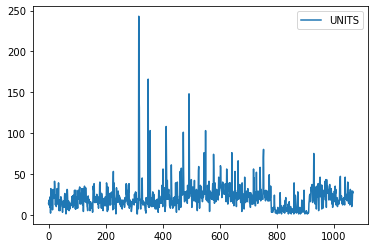

In [ ]:
df[['UNITS']].plot()

We can obtain the same results by using:

<AxesSubplot:>

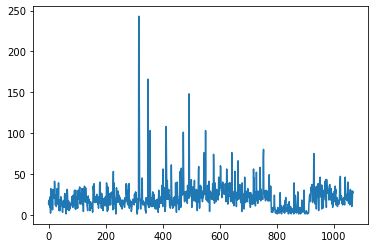

In [ ]:
df.UNITS.plot()

We can combine some of the functions and methods of `DataFrame` objects to visualize mininful information. For instance, if we are interested in visualizing the number of sold units of each product (`'UPC'`), we can do:

<AxesSubplot:ylabel='UPC'>

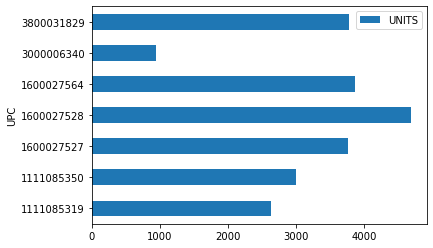

In [ ]:
df2 = df.groupby(['UPC']).sum().reset_index()
df2.plot(x='UPC', y='UNITS', kind='barh')

Or if we are interested in visualizing the average price and base price for each product, we can do:

<AxesSubplot:ylabel='UPC'>

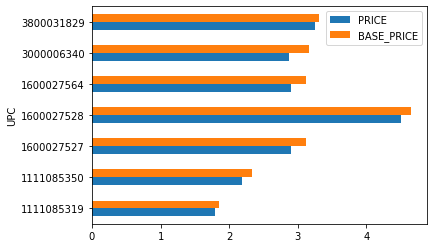

In [ ]:
df3 = df.groupby(['UPC']).mean().reset_index()
df3.plot(x='UPC', y=['PRICE', 'BASE_PRICE'], kind='barh')